In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd

In [20]:
df = pd.read_csv('translated_dataframe.csv')
df.head()

,id,conversation_id,created_at,date,time,user_id,tweet,language,hashtags,reply_to,translated_text,tokenized_text
0,1598103832080584704,1598103832080584704,2022-12-01 07:56:59 Malay Peninsula Standard Time,2022-12-01,07:56:59,1582818998324178944,Twitterのフォロワーを増やしたい。最低でも1万人。 #ChatGPT https:/...,ja,['chatgpt'],[],I want to increase my Twitter followers. At le...,"['I', 'want', 'to', 'increase', 'my', 'Twitter..."
1,1598103601507102720,1598103597388279808,2022-12-01 07:56:04 Malay Peninsula Standard Time,2022-12-01,07:56:04,1454189325432901640,"Overall, using AI to create art can expand the...",en,['chatgpt'],[],"Overall, using AI to create art can expand the...","['Overall', ',', 'using', 'AI', 'to', 'create'..."
2,1598103593634369536,1598103593634369536,2022-12-01 07:56:02 Malay Peninsula Standard Time,2022-12-01,07:56:02,118166119,Este prompt fue creado con #ChatGPT el nuevo m...,es,"['chatgpt', 'martesdedatos', 'chatgpt']",[],This prompt was created with #ChatGPT the new ...,"['This', 'prompt', 'was', 'created', 'with', '..."
3,1598103115060084736,1598103115060084736,2022-12-01 07:54:08 Malay Peninsula Standard Time,2022-12-01,07:54:08,141730376,Just played around with OpenAI's new #ChatGPT ...,en,"['chatgpt', 'embodiedcarbon', 'poetry']",[],Just played around with OpenAI's new #ChatGPT ...,"['Just', 'played', 'around', 'with', ""OpenAI's..."
4,1598102468243599361,1598102468243599360,2022-12-01 07:51:34 Malay Peninsula Standard Time,2022-12-01,07:51:34,4034337795,I asked #ChatGPT to write me a story about Sov...,en,['chatgpt'],[],I asked #ChatGPT to write me a story about Sov...,"['I', 'asked', '#ChatGPT', 'to', 'write', 'me'..."


In [21]:
df.shape

(35371, 12)

In [22]:
tokenized_text = df['tokenized_text']
display(tokenized_text)
print(type(tokenized_text))

0        ['I', 'want', 'to', 'increase', 'my', 'Twitter...
1        ['Overall', ',', 'using', 'AI', 'to', 'create'...
2        ['This', 'prompt', 'was', 'created', 'with', '...
3        ['Just', 'played', 'around', 'with', "OpenAI's...
4        ['I', 'asked', '#ChatGPT', 'to', 'write', 'me'...
                               ...                        
35366    ['According', 'to', '#ChatGPT', 'Xbox', 'has',...
35367    ['#ChatGPT', 'will', 'make', '10,000', 'channe...
35368                                         ['#ChatGPT']
35369    ['"', 'Finding', 'Indistinguishable', 'AI', 'G...
35370    ['#ChatGPT', 'from', 'is', 'not', 'connected',...
Name: tokenized_text, Length: 35371, dtype: object

<class 'pandas.core.series.Series'>


In [23]:
tokenized_big_list = []
for string in tokenized_text:
    removed_brackets_string = string.replace('[','').replace(']','')
    removed_quotes_string = removed_brackets_string.replace("'",'').replace("'",'')
    for word in removed_quotes_string.split(", "):
        tokenized_big_list.append(word)

print(tokenized_big_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
import preprocess2
chatgpt_corpus = preprocess2.load_corpus('./')
chatgpt_docs = preprocess2.corpus2docs(chatgpt_corpus)

import gensim
chatgpt_dictionary = gensim.corpora.Dictionary(chatgpt_docs)
chatgpt_vecs = preprocess2.docs2vecs(chatgpt_docs, chatgpt_dictionary)

In [25]:
#I used 10 topics. You can try other numbers as well
chatgpt_lda = gensim.models.ldamodel.LdaModel(corpus=chatgpt_vecs, id2word=chatgpt_dictionary, num_topics=10)

In [26]:
topics = chatgpt_lda.show_topics(10, 5)

for i in range(0, 10):
    print(topics[i])

(0, '0.029*"chatgpt" + 0.017*"https" + 0.011*"ai" + 0.005*"asked" + 0.005*"openai"')
(1, '0.050*"https" + 0.039*"chatgpt" + 0.012*"ai" + 0.007*"create" + 0.007*"openai"')
(2, '0.024*"chatgpt" + 0.023*"https" + 0.007*"ai" + 0.005*"create" + 0.004*"openai"')
(3, '0.089*"chatgpt" + 0.052*"https" + 0.014*"ai" + 0.011*"asked" + 0.008*"openai"')
(4, '0.019*"chatgpt" + 0.013*"https" + 0.006*"ai" + 0.004*"create" + 0.004*"openai"')
(5, '0.060*"chatgpt" + 0.041*"https" + 0.013*"ai" + 0.007*"openai" + 0.007*"asked"')
(6, '0.021*"chatgpt" + 0.012*"https" + 0.006*"ai" + 0.004*"openai" + 0.004*"asked"')
(7, '0.095*"chatgpt" + 0.075*"https" + 0.018*"ai" + 0.009*"asked" + 0.009*"create"')
(8, '0.059*"chatgpt" + 0.040*"https" + 0.014*"ai" + 0.007*"create" + 0.007*"asked"')
(9, '0.011*"chatgpt" + 0.010*"https" + 0.006*"ai" + 0.003*"openai" + 0.003*"asked"')


In [27]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [28]:
# Generate the visuals
visual= gensimvis.prepare(chatgpt_lda, chatgpt_vecs, chatgpt_dictionary)

/opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/lib/python3.11/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [29]:
#Save the output to the html file
pyLDAvis.save_html(visual, "topic_viz.html")

In [30]:
# Compute Perplexity
perplex= chatgpt_lda.log_perplexity(chatgpt_vecs, total_docs=None) 
#For LDAModel a measure of how good the model is. lower the better.

In [31]:
print('\nPerplexity for LDAModel: ', perplex)


Perplexity for LDAModel:  -7.456345101628141


In [32]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=chatgpt_lda, texts=chatgpt_docs, dictionary=chatgpt_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)


Coherence Score LDAModel:  0.2526032968480466


In [33]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    chatgpt_lda_x = gensim.models.ldamodel.LdaModel(corpus=chatgpt_vecs, id2word=chatgpt_dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=chatgpt_lda_x, texts=chatgpt_docs, dictionary=chatgpt_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(chatgpt_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2023-03-31 17:16:28.998884
#Topics: 2 Score: 0.26682151493694484
#Topics: 4 Score: 0.2628412821269349
#Topics: 6 Score: 0.282599356810097
#Topics: 8 Score: 0.25771060561827813
2023-03-31 17:16:36.013964


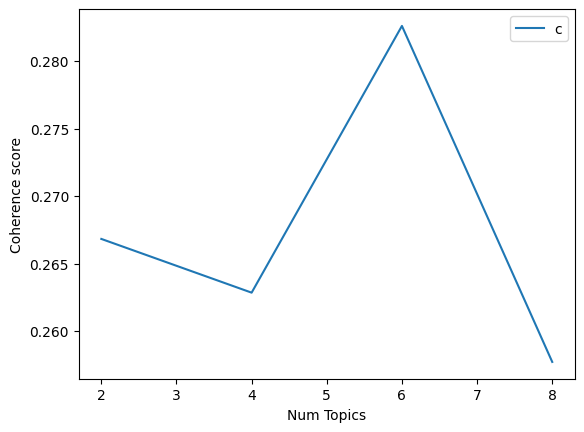

In [34]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2668
Num Topics = 4  has Coherence Value of 0.2628
Num Topics = 6  has Coherence Value of 0.2826
Num Topics = 8  has Coherence Value of 0.2577


In [36]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[2] where the number of topics is 6

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[2], corpus=chatgpt_vecs, data=chatgpt_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/var/folders/lh/jv6w86l97yjg09r_3ht3_15c0000gq/T/ipykernel_10139/3888425836.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.9987,"chatgpt, https, ai, create, asked, openai, wri...","[want, increase, twitter, followers, least, ch..."


In [ ]:
# need to save this 